# Data Preprocessing for RAG Pipeline
This notebook focuses on preprocessing the filtered complaint data to prepare it for the RAG pipeline. We'll clean the text narratives, handle any remaining issues, and prepare the data for embedding.

## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

plt.style.use('ggplot')
sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text Cleaning Functions

In [2]:
def remove_special_characters(text):
    if not isinstance(text, str): return ''
    return re.sub(r'[^\w\s.,!?\'":\-]', ' ', text)

def remove_extra_whitespace(text):
    if not isinstance(text, str): return ''
    text = re.sub(r'[\n\t\r]', ' ', text)
    return re.sub(r'\s+', ' ', text).strip()

def remove_boilerplate(text):
    if not isinstance(text, str): return ''
    boilerplate = [
        'I am writing to file a complaint',
        'I would like to file a complaint',
        'I am filing a complaint',
        'I am submitting this complaint',
        'I wish to file a complaint',
        'XXXX', 'XX/XX/XXXX'
    ]
    for phrase in boilerplate:
        text = text.replace(phrase, '')
    text = re.sub(r'X{2,}', '[REDACTED]', text)
    text = re.sub(r'X{1,2}/X{1,2}/X{2,4}', '[DATE]', text)
    return text

def clean_text(text):
    if not isinstance(text, str): return ''
    text = text.lower()
    text = remove_boilerplate(text)
    text = remove_special_characters(text)
    text = remove_extra_whitespace(text)
    return text

In [3]:
# Data Preprocessing for RAG Pipeline

import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm


In [4]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Set plot style
plt.style.use('ggplot')
sns.set(style='whitegrid')

In [7]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [8]:
# Load the filtered dataset
data_path = '../Data/processed/filtered_complaints.csv'
complaints_df = pd.read_csv(data_path)

# Display basic information
print(f'Dataset shape: {complaints_df.shape}')
complaints_df.head()

Dataset shape: (363412, 19)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_word_count
0,2025-06-13,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,i made the mistake of using my wellsfargo debi...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,ID,83815,NaN,Consent provided,Web,2025-06-13,Closed with explanation,Yes,NaN,14061897,109
1,2025-06-08,Checking or savings account,Checking account,Managing an account,Problem accessing account,got locked out of my account because i was try...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MI,49401,Servicemember,Consent provided,Web,2025-06-08,Closed with explanation,Yes,NaN,13960106,235
2,2025-06-09,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,i am in the process of applying for a mortgage...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,77047,NaN,Consent provided,Web,2025-06-09,Closed with explanation,Yes,NaN,13976941,57
3,2025-06-09,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,NaN,this all happened in xxxx and xxxx was taken f...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,75602,Servicemember,Consent provided,Web,2025-06-09,Closed with explanation,Yes,NaN,13974625,510
4,2025-05-30,Checking or savings account,Savings account,Closing an account,Company closed your account,usaa savings bank decided to close my account ...,Company has responded to the consumer and the ...,UNITED SERVICES AUTOMOBILE ASSOCIATION,TX,XXXXX,Servicemember,Consent provided,Web,2025-05-30,Closed with explanation,Yes,NaN,13810547,64


In [9]:

# Text Cleaning Functions
def remove_special_characters(text):
    """Remove special characters, keeping only alphanumeric and basic punctuation."""
    if not isinstance(text, str):
        return ''
    # Keep alphanumeric, spaces, and basic punctuation
    return re.sub(r'[^\w\s.,!?\-\"\':]', ' ', text)

def remove_extra_whitespace(text):
    """Remove extra whitespace, including newlines and tabs."""
    if not isinstance(text, str):
        return ''
    # Replace newlines and tabs with spaces
    text = re.sub(r'[\n\t\r]', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def remove_boilerplate(text):
    """Remove common boilerplate text from complaints."""
    if not isinstance(text, str):
        return ''
    
    # Common phrases to remove
    boilerplate = [
        r'\b(?:i am writing to file a complaint|this is a complaint about|i am filing a complaint regarding|'
        r'dear sir/madam|to whom it may concern|please be advised that|i am writing to express my concern|'
        r'i am writing to file a formal complaint|i am writing to report an issue)\b[.,]?',
        r'\b(?:regarding|re:|fw:|fwd:|sent from my iphone|sent from my android|thank you|sincerely|best regards|'
        r'yours truly|please let me know|please contact me|please advise|as soon as possible|asap)\b[.,]?'
    ]
    
    for pattern in boilerplate:
        text = re.sub(pattern, ' ', text, flags=re.IGNORECASE)
    
    return text

def clean_text(text):
    """Apply all cleaning functions in sequence."""
    if not isinstance(text, str):
        return ''
    
    # Apply cleaning functions in sequence
    text = text.lower()  # Convert to lowercase
    text = remove_boilerplate(text)
    text = remove_special_characters(text)
    text = remove_extra_whitespace(text)
    
    return text

In [10]:

# Apply text cleaning to the complaint narratives
print("Cleaning complaint narratives...")
tqdm.pandas()
complaints_df['cleaned_narrative'] = complaints_df['Consumer complaint narrative'].progress_apply(clean_text)

Cleaning complaint narratives...


  0%|          | 0/363412 [00:00<?, ?it/s]

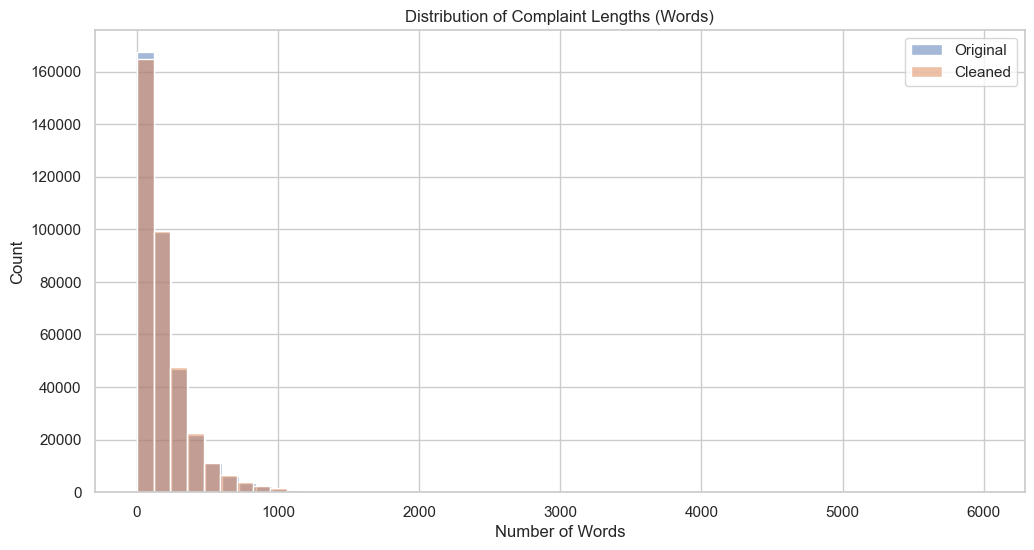

In [11]:


# Analyze text lengths before and after cleaning
complaints_df['original_length'] = complaints_df['Consumer complaint narrative'].str.split().str.len()
complaints_df['cleaned_length'] = complaints_df['cleaned_narrative'].str.split().str.len()

# Plot the distribution of text lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=complaints_df, x='original_length', bins=50, alpha=0.5, label='Original')
sns.histplot(data=complaints_df, x='cleaned_length', bins=50, alpha=0.5, label='Cleaned')
plt.title('Distribution of Complaint Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.legend()
plt.show()

In [12]:
# Save the cleaned data
output_path = '../Data/processed/cleaned_complaints.csv'
complaints_df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

# Display basic statistics
print("\nText Length Statistics:")
print(f"Average original length: {complaints_df['original_length'].mean():.1f} words")
print(f"Average cleaned length: {complaints_df['cleaned_length'].mean():.1f} words")
print(f"Characters removed: {complaints_df['original_length'].sum() - complaints_df['cleaned_length'].sum():,} characters")

Cleaned data saved to ../Data/processed/cleaned_complaints.csv

Text Length Statistics:
Average original length: 205.5 words
Average cleaned length: 204.7 words
Characters removed: 315,377 characters
